# Section 3. Julia Without Tears: Introduction to Differential Equations
#### Author: Bruno Cavani

---

This notebook intends to present an instructive-and-useful introduction to Differential Equations in Julia, using `DifferentialEquations`. A great reference and extension can be found in [Chris Rackauckas Tutorial](https://tutorials.sciml.ai/html/introduction/01-ode_introduction.html).

## 3.1. Defining an ODE

Recall that we define an [ordinary differential equation](https://en.wikipedia.org/wiki/Ordinary_differential_equation) as an equation which describes the way that a variable $u$ changes, i.e.

\begin{align*}
    u' = f(u,p,t)
\end{align*}

where 

\begin{align*}
    p &\equiv \text{ parameters of the model} \\
    t &\equiv \text{ time variable} \\
    f &\equiv \text{ nonlinear model of how $u$ changes}
\end{align*}

and given an initial value,

\begin{align*}
    u(t_0) \equiv u(0) \equiv u_0
\end{align*}

you know how the value will change with time, then you know what the value will be at any time point in the future.

### 3.1.1. An Exponential-Growth Example

Our first model will be the canonical exponential growth model. This model says that the rate of change is proportional to the current value,

\begin{align*}
    \frac{\mathrm{d}u(t)}{\mathrm{d}t} = -a \cdot u(t) \iff u' = -a \cdot u
\end{align*}

where we have some $a = 0.05$ decreasing rate, and a starting value $u_0 = 100$. 

We can encode this into Julia by noticing that, in this setup, we match the general form when

In [1]:
f(u,p,t) = -0.05u

f (generic function with 1 method)

In general, If we want to solve this model on a time span from $t \in (0,100)$, then we define an `ODEProblem` by specifying this function `f`, this initial condition `u0`, and this time span as follows

In [2]:
using DifferentialEquations

In [3]:
u0 = 100
timespan = (0,100)
problem = ODEProblem(f,u0,timespan)

ODEProblem with uType Int64 and tType Int64. In-place: false
timespan: (0, 100)
u0: 100

thus, to solve the `ODEProblem` we can use the command `solve`, i.e.

In [4]:
solution = solve(problem)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 13-element Vector{Float64}:
   0.0
   0.1820567844139922
   2.002624628553914
   6.710493567883864
  12.925633571629966
  20.339938845101088
  29.068662452096095
  38.89048291163367
  49.7437683143729
  61.45601054326876
  73.91942074920743
  87.00216124928028
 100.0
u: 13-element Vector{Float64}:
 100.0
  99.09384661930439
  90.47186827553232
  71.49628760363632
  52.39906002406572
  36.16796622751587
  23.376680761028542
  14.305599733308052
   8.314434596755419
   4.629236622286603
   2.4824319870089826
   1.2906246051487666
   0.6738537391200752

and that's it: we have succesfully solved our first ODE!

## 3.2. Analyzing the ODE Solution

In the previous subsection, we solved a ODE problem. However, the solution type is not interesting in and of itself. We want to understand the solution!

The reader might find a complete manual in [Solution Handling](https://diffeq.sciml.ai/dev/basics/solution/).

First, we can plot the solution (or the time path) of $u(t)$ using `Plots`:

In [5]:
using Plots

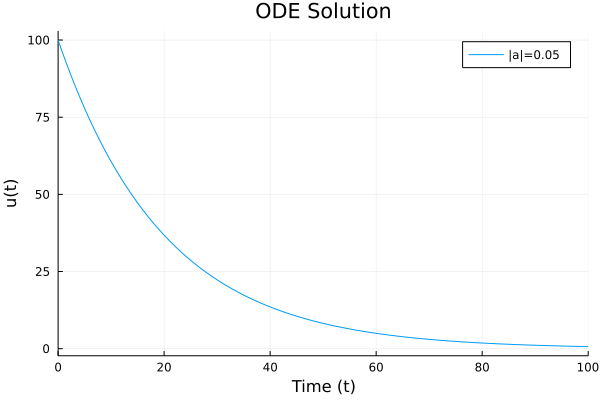

In [6]:
plot(solution, title="ODE Solution", label="|a|=0.05", xaxis="Time (t)", yaxis="u(t)")

where the exponential curve in the figure matches our intuition.

## 3.3. Systems of ODEs: The Lorenz Equation

Now, let us move to a system of ODEs. The Lorenz equation is the famous *butterfly attractor* that spawned Chaos Theory, and it is defined by the following system of ODEs:

\begin{align*}
\frac{d x}{d t}&=\sigma(y-x) \\
\frac{d y}{d t}&=x(\rho-z) - y \\
\frac{d z}{d t}&=x y-\beta z
\end{align*}

and in order to define a system of equations using `DifferentialEquations` is sufficient to let $u = (x,y,z)$ and define a vector function with a vector initial condition, i.e.

In [7]:
function lorenz!(du,u,p,t)
    σ,ρ,β = p
    du[1] = σ*(u[2]-u[1])
    du[2] = u[1]*(ρ-u[3]) - u[2]
    du[3] = u[1]*u[2] - β*u[3]
end

lorenz! (generic function with 1 method)

where if choose $u_0 = (1,0,0)$ and set $p \equiv (\sigma,\rho,\beta) = (10,28,8/3)$, then we can define the `ODEProblem`

In [8]:
u0 = [1.0,0.0,0.0]
p = (σ = 10, ρ = 28, β = 8/3)
timespan = (0.0,100.0)
problem = ODEProblem(lorenz!, u0, timespan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 3-element Vector{Float64}:
 1.0
 0.0
 0.0

and extract its solution which, in this case, can be posed as a matrix, that is,

In [9]:
solution = solve(problem)
Array(solution)

3×1289 Matrix{Float64}:
 1.0  0.999643     0.996105    0.969359     …  0.506309  0.977464  1.16793
 0.0  0.000998805  0.0109654   0.0897706       0.943588  1.87211   2.25241
 0.0  1.78143e-8   2.14696e-6  0.000143802     9.47862   7.84926   7.49689

and plotting will by default show the time series for each variable:

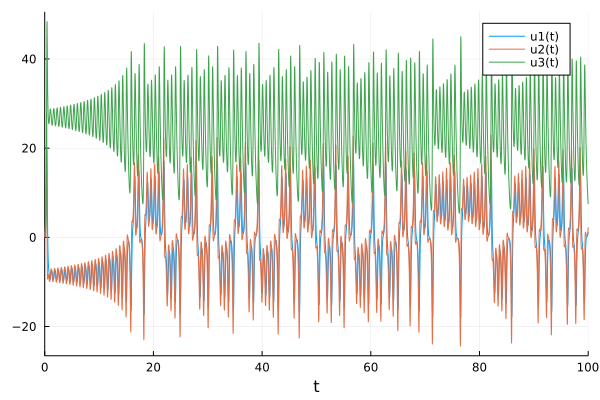

In [10]:
plot(solution)

If we instead want to plot values against each other, which can be particularly useful in the case of systems of ODEs, we can use the `vars` command. 

For example, let us plot $x$ against $y$ against $z$,

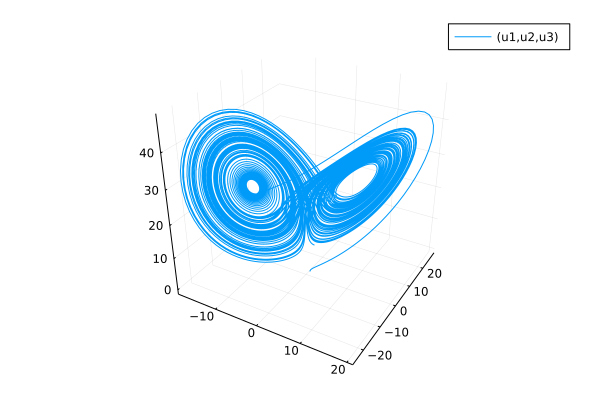

In [11]:
plot(solution,vars=(1,2,3))

Actually, the tools in the `Plots` package allow us to have a very cool animation of this object, which we can easily reproduce here.

┌ Info: Saved animation to 
│   fn = /Users/brunocavani/OneDrive - Insper - Institudo de Ensino e Pesquisa/PhD, Economics/Julia Lectures/tmp.gif
└ @ Plots /Users/brunocavani/.julia/packages/Plots/3E7jF/src/animation.jl:114


Plots.AnimatedGif("/Users/brunocavani/OneDrive - Insper - Institudo de Ensino e Pesquisa/PhD, Economics/Julia Lectures/tmp.gif")
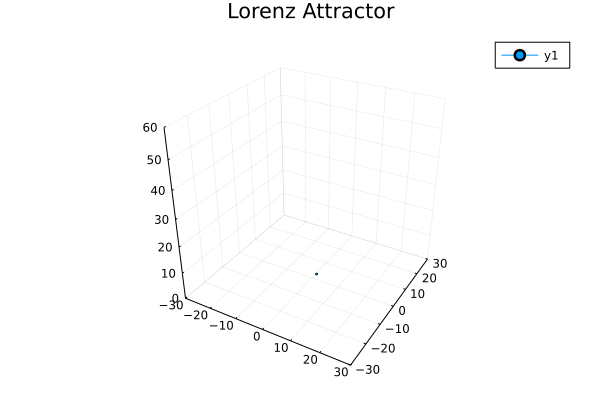

In [12]:
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x);         l.x += l.dt * dx
    dy = l.x * (l.ρ - l.z) - l.y;   l.y += l.dt * dy
    dz = l.x * l.y - l.β * l.z;     l.z += l.dt * dz
end

attractor = Lorenz()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10
